In [1]:
import os
from pathlib import Path
import logging
from datetime import datetime

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Set up logging and CSV export directories
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_dir = Path("figures/optimizer/logs")
csv_dir = Path("figures/optimizer/csv_exports")
log_dir.mkdir(parents=True, exist_ok=True)
csv_dir.mkdir(parents=True, exist_ok=True)

log_file = log_dir / f"optimizer_analysis_{timestamp}.log"

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler(),  # Also log to console
    ],
)

logger = logging.getLogger(__name__)
logger.info(f"Starting optimizer performance analysis - Log file: {log_file}")
logger.info(f"CSV exports will be saved to: {csv_dir}")

# Get list of all CSV files in the directory
list_of_commits = list(Path("../../logs/performance/analysis").glob("*/"))
list_of_commits.sort(key=os.path.getmtime, reverse=True)
list_of_commits = list_of_commits[:1]

# Initialize an empty DataFrame to store combined results
df_latest = pd.DataFrame()

list_of_files = list(Path(list_of_commits[0] / "all").glob("*.csv"))
logger.info(f"Processing {len(list_of_files)} CSV files from {list_of_commits[0]}")

# For each file in this commit
for file_path in list_of_files:
    # Read the CSV file
    temp_df = pd.read_csv(file_path)
    # Append to the main DataFrame
    df_latest = pd.concat([df_latest, temp_df], ignore_index=True)

# Adjust num_workers: subtract 1 if not 0
df_latest["fainder_max_workers"] = df_latest["fainder_max_workers"].apply(
    lambda x: x - 1 if x != 0 else x
)

# Strip whitespace and normalize the category column
df_latest["category"] = df_latest["category"].str.strip()

logger.info(f"Loaded {len(df_latest)} total records")
logger.info(f"Unique categories: {list(df_latest['category'].unique())}")
logger.info(f"Unique fainder modes: {list(df_latest['fainder_mode'].unique())}")

# Check optimizer columns
optimizer_cols = [
    "optimizer_cost_sorting",
    "optimizer_keyword_merging",
    "optimizer_split_up_junctions",
]
for col in optimizer_cols:
    if col in df_latest.columns:
        unique_vals = df_latest[col].unique()
        logger.info(f"{col}: {list(unique_vals)}")
    else:
        logger.warning(f"Column {col} not found in data")

# Save processed data to CSV
processed_data_file = csv_dir / f"processed_data_{timestamp}.csv"
df_latest.to_csv(processed_data_file, index=False)
logger.info(f"Saved processed data to: {processed_data_file}")

os.makedirs("figures/optimizer", exist_ok=True)

print("Data loaded successfully!")
print(f"Shape: {df_latest.shape}")
print("Optimizer columns available:")
for col in optimizer_cols:
    if col in df_latest.columns:
        print(f"  {col}: {df_latest[col].unique()}")

2025-07-04 13:10:34,537 - INFO - Starting optimizer performance analysis - Log file: figures/optimizer/logs/optimizer_analysis_20250704_131034.log
2025-07-04 13:10:34,537 - INFO - CSV exports will be saved to: figures/optimizer/csv_exports
2025-07-04 13:10:34,539 - INFO - Processing 5 CSV files from ../../logs/performance/analysis/add-analysis_ffb29f81c0c8c74f1a15be72c382b2549afefd08
2025-07-04 13:10:34,537 - INFO - CSV exports will be saved to: figures/optimizer/csv_exports
2025-07-04 13:10:34,539 - INFO - Processing 5 CSV files from ../../logs/performance/analysis/add-analysis_ffb29f81c0c8c74f1a15be72c382b2549afefd08
2025-07-04 13:10:34,563 - INFO - Loaded 1448 total records
2025-07-04 13:10:34,565 - INFO - Unique categories: ['Multiple_Percentile_Combinations', 'base_keyword_queries_with_multiple_elements']
2025-07-04 13:10:34,565 - INFO - Unique fainder modes: ['full_precision', 'exact']
2025-07-04 13:10:34,566 - INFO - optimizer_cost_sorting: [np.True_, np.False_]
2025-07-04 13:10

Data loaded successfully!
Shape: (1448, 20)
Optimizer columns available:
  optimizer_cost_sorting: [ True False]
  optimizer_keyword_merging: [ True False]
  optimizer_split_up_junctions: [ True]


2025-07-04 13:10:34,684 - INFO - === Keyword Merging Optimization Analysis ===
2025-07-04 13:10:34,687 - INFO - Found 48 records for keyword-related categories
2025-07-04 13:10:34,689 - INFO - Analyzing category: base_keyword_queries_with_multiple_elements (48 records)
2025-07-04 13:10:34,690 - INFO -   Fainder mode: full_precision (24 records)
2025-07-04 13:10:34,687 - INFO - Found 48 records for keyword-related categories
2025-07-04 13:10:34,689 - INFO - Analyzing category: base_keyword_queries_with_multiple_elements (48 records)
2025-07-04 13:10:34,690 - INFO -   Fainder mode: full_precision (24 records)
2025-07-04 13:10:34,820 - INFO -     Saved plot: figures/optimizer/keyword_merging_base_keyword_queries_with_multiple_elements_full_precision.png
2025-07-04 13:10:34,820 - INFO -     Saved plot: figures/optimizer/keyword_merging_base_keyword_queries_with_multiple_elements_full_precision.png


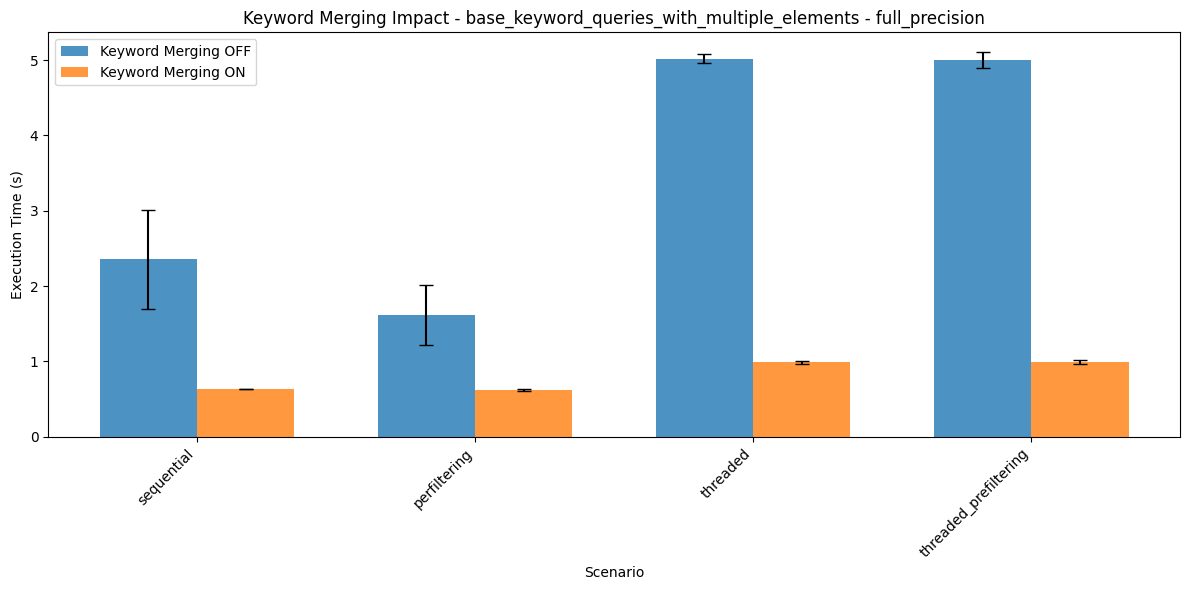

2025-07-04 13:10:34,883 - INFO -     sequential: 73.00% improvement when ON
2025-07-04 13:10:34,883 - INFO -     perfiltering: 61.56% improvement when ON
2025-07-04 13:10:34,883 - INFO -     threaded: 80.31% improvement when ON
2025-07-04 13:10:34,884 - INFO -     threaded_prefiltering: 80.14% improvement when ON
2025-07-04 13:10:34,883 - INFO -     perfiltering: 61.56% improvement when ON
2025-07-04 13:10:34,883 - INFO -     threaded: 80.31% improvement when ON
2025-07-04 13:10:34,884 - INFO -     threaded_prefiltering: 80.14% improvement when ON
2025-07-04 13:10:34,884 - INFO -   Fainder mode: exact (24 records)
2025-07-04 13:10:34,884 - INFO -   Fainder mode: exact (24 records)
2025-07-04 13:10:34,997 - INFO -     Saved plot: figures/optimizer/keyword_merging_base_keyword_queries_with_multiple_elements_exact.png
2025-07-04 13:10:34,997 - INFO -     Saved plot: figures/optimizer/keyword_merging_base_keyword_queries_with_multiple_elements_exact.png


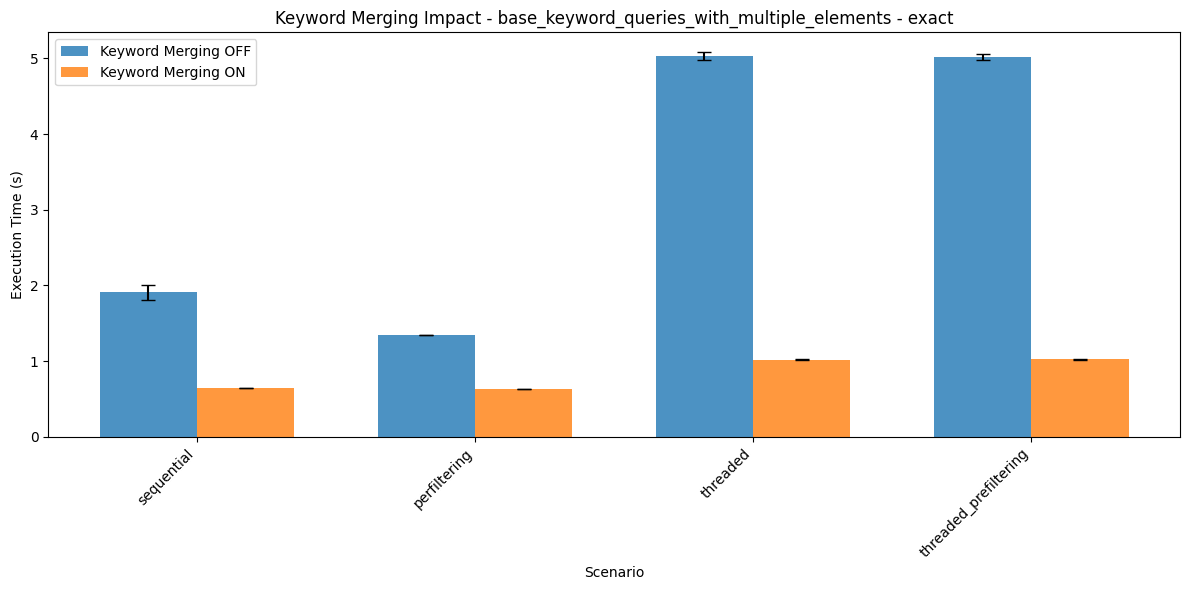

2025-07-04 13:10:35,065 - INFO -     sequential: 66.50% improvement when ON
2025-07-04 13:10:35,065 - INFO -     perfiltering: 52.96% improvement when ON
2025-07-04 13:10:35,065 - INFO -     threaded: 79.74% improvement when ON
2025-07-04 13:10:35,066 - INFO -     threaded_prefiltering: 79.65% improvement when ON
2025-07-04 13:10:35,067 - INFO - Saved keyword merging statistics to: figures/optimizer/csv_exports/keyword_merging_stats_20250704_131034.csv
2025-07-04 13:10:35,065 - INFO -     perfiltering: 52.96% improvement when ON
2025-07-04 13:10:35,065 - INFO -     threaded: 79.74% improvement when ON
2025-07-04 13:10:35,066 - INFO -     threaded_prefiltering: 79.65% improvement when ON
2025-07-04 13:10:35,067 - INFO - Saved keyword merging statistics to: figures/optimizer/csv_exports/keyword_merging_stats_20250704_131034.csv


In [2]:
# ========================================
# KEYWORD MERGING OPTIMIZATION ANALYSIS
# ========================================

logger.info("=== Keyword Merging Optimization Analysis ===")

# Filter for categories that involve keywords and multiple elements
keyword_categories = [
    "base_keyword_queries_with_multiple_elements",
]

# Check if optimizer_keyword_merging column exists
if "optimizer_keyword_merging" not in df_latest.columns:
    logger.warning(
        "optimizer_keyword_merging column not found in data - skipping keyword merging analysis"
    )
else:
    keyword_merging_stats = []

    # Filter data for keyword-related categories
    df_keywords = df_latest[df_latest["category"].isin(keyword_categories)]
    logger.info(f"Found {len(df_keywords)} records for keyword-related categories")

    if not df_keywords.empty:
        # Group by optimizer setting, fainder_mode, and scenario
        for category in keyword_categories:
            df_cat = df_keywords[df_keywords["category"] == category]
            if df_cat.empty:
                continue

            logger.info(f"Analyzing category: {category} ({len(df_cat)} records)")

            # Create comparison plot for each fainder_mode
            for fainder_mode in df_cat["fainder_mode"].unique():
                df_mode = df_cat[df_cat["fainder_mode"] == fainder_mode]
                if df_mode.empty:
                    continue

                logger.info(f"  Fainder mode: {fainder_mode} ({len(df_mode)} records)")

                # Group by optimizer setting and scenario
                comparison_data = []

                for kw_merging in df_mode["optimizer_keyword_merging"].unique():
                    df_opt = df_mode[df_mode["optimizer_keyword_merging"] == kw_merging]

                    for scenario in df_opt["scenario"].unique():
                        df_scenario = df_opt[df_opt["scenario"] == scenario]

                        if not df_scenario.empty:
                            mean_time = df_scenario["execution_time"].mean()
                            std_time = df_scenario["execution_time"].std()
                            min_time = df_scenario["execution_time"].min()
                            max_time = df_scenario["execution_time"].max()
                            count = len(df_scenario)

                            comparison_data.append(
                                {
                                    "category": category,
                                    "fainder_mode": fainder_mode,
                                    "optimizer_keyword_merging": kw_merging,
                                    "scenario": scenario,
                                    "mean_execution_time": mean_time,
                                    "std_execution_time": std_time,
                                    "min_execution_time": min_time,
                                    "max_execution_time": max_time,
                                    "count": count,
                                }
                            )

                            keyword_merging_stats.append(
                                {
                                    "category": category,
                                    "fainder_mode": fainder_mode,
                                    "optimizer_keyword_merging": kw_merging,
                                    "scenario": scenario,
                                    "mean": mean_time,
                                    "std": std_time,
                                    "min": min_time,
                                    "max": max_time,
                                    "count": count,
                                }
                            )

                if comparison_data:
                    # Create comparison plot
                    plt.figure(figsize=(12, 6))

                    comparison_df = pd.DataFrame(comparison_data)

                    # Create grouped bar plot
                    scenarios = comparison_df["scenario"].unique()
                    x = np.arange(len(scenarios))
                    width = 0.35

                    opt_on = comparison_df[
                        comparison_df["optimizer_keyword_merging"] == True
                    ]
                    opt_off = comparison_df[
                        comparison_df["optimizer_keyword_merging"] == False
                    ]

                    if not opt_on.empty and not opt_off.empty:
                        # Align data by scenario
                        on_means = [
                            opt_on[opt_on["scenario"] == s]["mean_execution_time"].iloc[
                                0
                            ]
                            if not opt_on[opt_on["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]
                        off_means = [
                            opt_off[opt_off["scenario"] == s][
                                "mean_execution_time"
                            ].iloc[0]
                            if not opt_off[opt_off["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]

                        on_stds = [
                            opt_on[opt_on["scenario"] == s]["std_execution_time"].iloc[
                                0
                            ]
                            if not opt_on[opt_on["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]
                        off_stds = [
                            opt_off[opt_off["scenario"] == s][
                                "std_execution_time"
                            ].iloc[0]
                            if not opt_off[opt_off["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]

                        plt.bar(
                            x - width / 2,
                            off_means,
                            width,
                            label="Keyword Merging OFF",
                            alpha=0.8,
                            yerr=off_stds,
                            capsize=5,
                        )
                        plt.bar(
                            x + width / 2,
                            on_means,
                            width,
                            label="Keyword Merging ON",
                            alpha=0.8,
                            yerr=on_stds,
                            capsize=5,
                        )

                        plt.xlabel("Scenario")
                        plt.ylabel("Execution Time (s)")
                        plt.title(
                            f"Keyword Merging Impact - {category} - {fainder_mode}"
                        )
                        plt.xticks(x, scenarios, rotation=45, ha="right")
                        plt.legend()
                        plt.tight_layout()

                        filename = f"figures/optimizer/keyword_merging_{category}_{fainder_mode}.png"
                        plt.savefig(filename)
                        logger.info(f"    Saved plot: {filename}")
                        plt.show()

                        # Log performance comparison
                        for i, scenario in enumerate(scenarios):
                            if on_means[i] > 0 and off_means[i] > 0:
                                improvement = (
                                    (off_means[i] - on_means[i]) / off_means[i]
                                ) * 100
                                logger.info(
                                    f"    {scenario}: {improvement:.2f}% improvement when ON"
                                )

    # Save keyword merging statistics
    if keyword_merging_stats:
        kw_stats_df = pd.DataFrame(keyword_merging_stats)
        kw_stats_file = csv_dir / f"keyword_merging_stats_{timestamp}.csv"
        kw_stats_df.to_csv(kw_stats_file, index=False)
        logger.info(f"Saved keyword merging statistics to: {kw_stats_file}")

2025-07-04 13:10:35,079 - INFO - === Cost Sorting Optimization Analysis ===
2025-07-04 13:10:35,081 - INFO - Found 1400 records for cost sorting-related categories
2025-07-04 13:10:35,083 - INFO - Analyzing category: Multiple_Percentile_Combinations (1400 records)
2025-07-04 13:10:35,084 - INFO -   Fainder mode: full_precision (700 records)
2025-07-04 13:10:35,081 - INFO - Found 1400 records for cost sorting-related categories
2025-07-04 13:10:35,083 - INFO - Analyzing category: Multiple_Percentile_Combinations (1400 records)
2025-07-04 13:10:35,084 - INFO -   Fainder mode: full_precision (700 records)
2025-07-04 13:10:35,440 - INFO -     Saved plot: figures/optimizer/cost_sorting_Multiple_Percentile_Combinations_full_precision.png
2025-07-04 13:10:35,440 - INFO -     Saved plot: figures/optimizer/cost_sorting_Multiple_Percentile_Combinations_full_precision.png


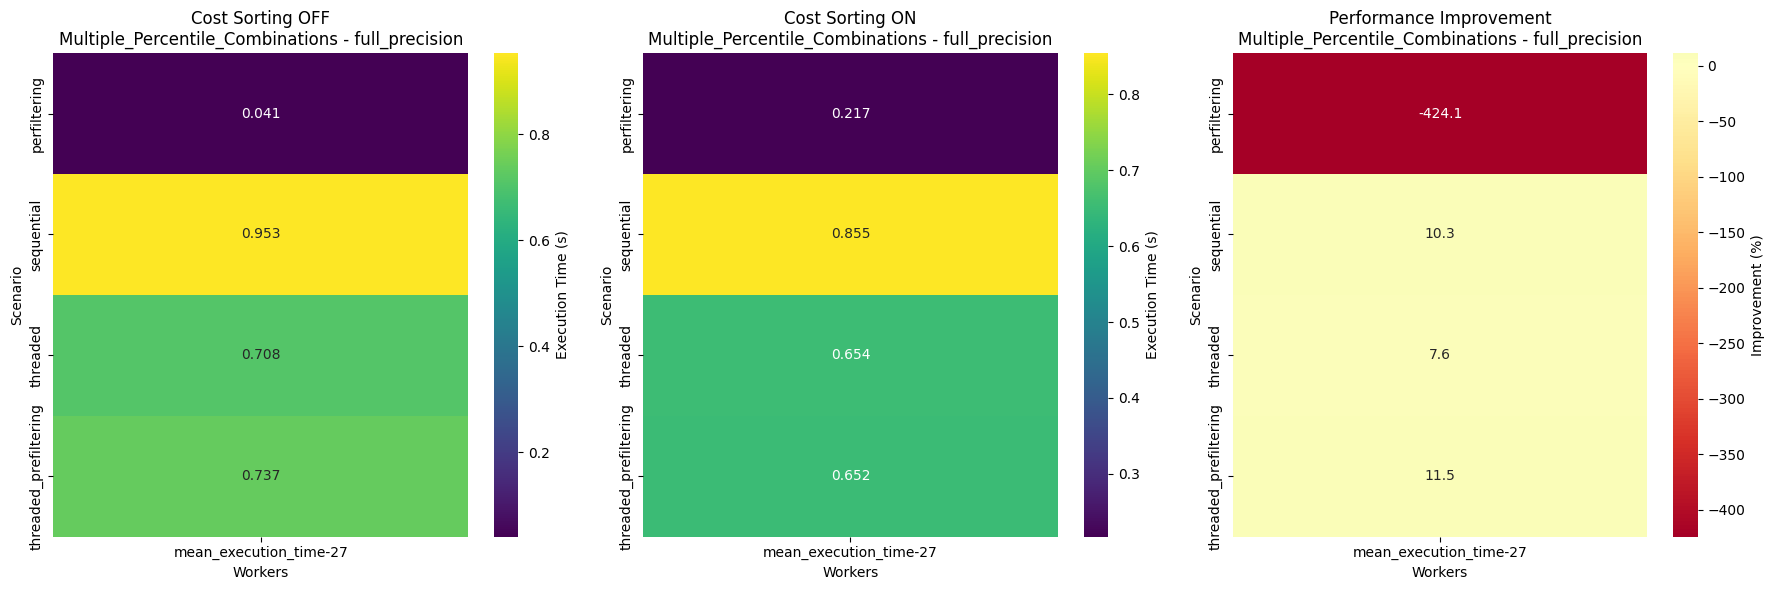

2025-07-04 13:10:35,573 - INFO -     Overall improvement with cost sorting: 2.51%
2025-07-04 13:10:35,576 - INFO -   Fainder mode: exact (700 records)
2025-07-04 13:10:35,576 - INFO -   Fainder mode: exact (700 records)
2025-07-04 13:10:35,987 - INFO -     Saved plot: figures/optimizer/cost_sorting_Multiple_Percentile_Combinations_exact.png
2025-07-04 13:10:35,987 - INFO -     Saved plot: figures/optimizer/cost_sorting_Multiple_Percentile_Combinations_exact.png


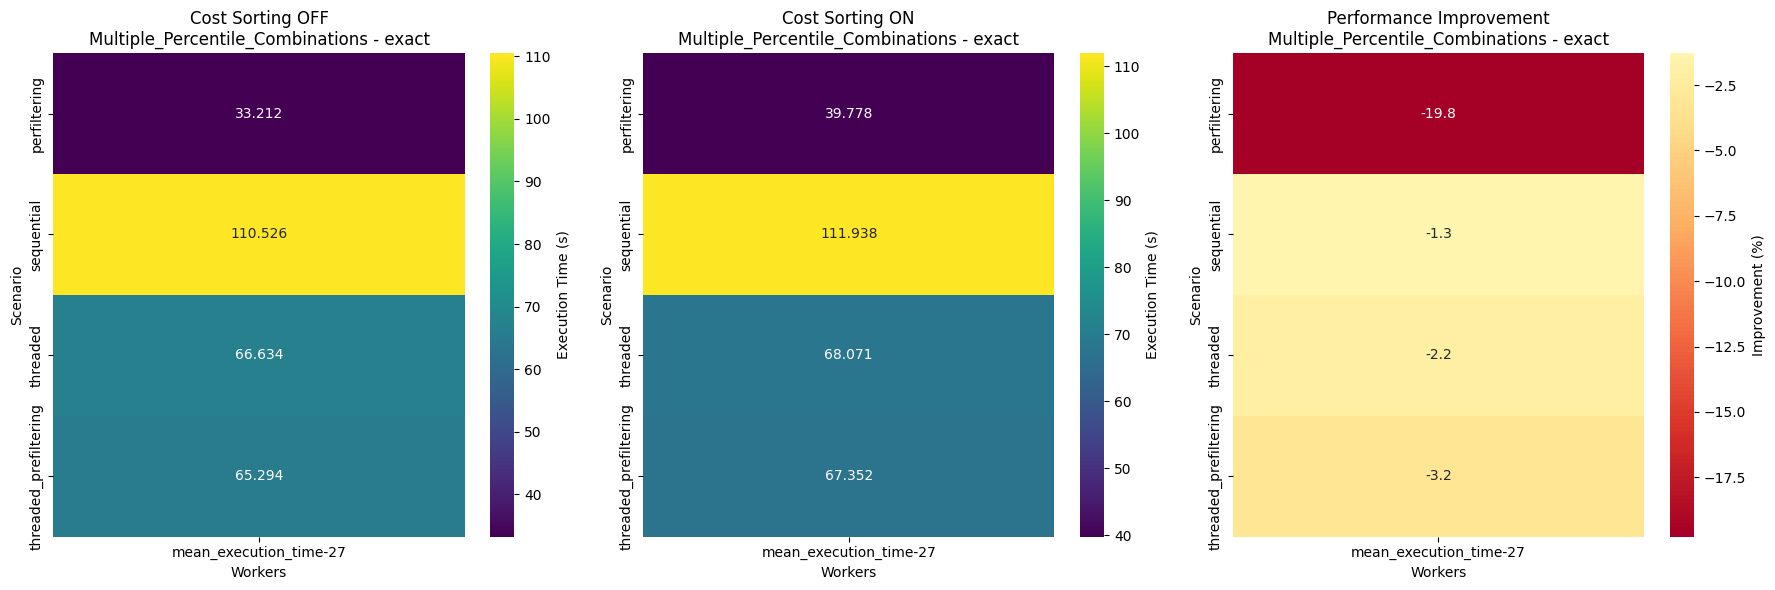

2025-07-04 13:10:36,120 - INFO -     Overall improvement with cost sorting: -4.16%
2025-07-04 13:10:36,122 - INFO - Saved cost sorting statistics to: figures/optimizer/csv_exports/cost_sorting_stats_20250704_131034.csv
2025-07-04 13:10:36,122 - INFO - Saved cost sorting statistics to: figures/optimizer/csv_exports/cost_sorting_stats_20250704_131034.csv


In [3]:
# ========================================
# COST SORTING OPTIMIZATION ANALYSIS
# ========================================

logger.info("=== Cost Sorting Optimization Analysis ===")

# Filter for categories that involve multiple percentile combinations
cost_sorting_categories = [
    "Multiple_Percentile_Combinations",
]

# Check if optimizer_cost_sorting column exists
if "optimizer_cost_sorting" not in df_latest.columns:
    logger.warning(
        "optimizer_cost_sorting column not found in data - skipping cost sorting analysis"
    )
else:
    cost_sorting_stats = []

    # Filter data for percentile-related categories
    df_cost_sorting = df_latest[df_latest["category"].isin(cost_sorting_categories)]
    logger.info(
        f"Found {len(df_cost_sorting)} records for cost sorting-related categories"
    )

    if not df_cost_sorting.empty:
        # Create comprehensive comparison
        for category in cost_sorting_categories:
            df_cat = df_cost_sorting[df_cost_sorting["category"] == category]
            if df_cat.empty:
                continue

            logger.info(f"Analyzing category: {category} ({len(df_cat)} records)")

            # Create comparison plot for each fainder_mode
            for fainder_mode in df_cat["fainder_mode"].unique():
                df_mode = df_cat[df_cat["fainder_mode"] == fainder_mode]
                if df_mode.empty:
                    continue

                logger.info(f"  Fainder mode: {fainder_mode} ({len(df_mode)} records)")

                # Group by optimizer setting, scenario, and workers
                comparison_data = []

                for cost_sorting in df_mode["optimizer_cost_sorting"].unique():
                    df_opt = df_mode[df_mode["optimizer_cost_sorting"] == cost_sorting]

                    for scenario in df_opt["scenario"].unique():
                        df_scenario = df_opt[df_opt["scenario"] == scenario]

                        for workers in df_scenario["fainder_max_workers"].unique():
                            df_workers = df_scenario[
                                df_scenario["fainder_max_workers"] == workers
                            ]

                            if not df_workers.empty:
                                mean_time = df_workers["execution_time"].mean()
                                std_time = df_workers["execution_time"].std()
                                min_time = df_workers["execution_time"].min()
                                max_time = df_workers["execution_time"].max()
                                count = len(df_workers)

                                comparison_data.append(
                                    {
                                        "category": category,
                                        "fainder_mode": fainder_mode,
                                        "optimizer_cost_sorting": cost_sorting,
                                        "scenario": scenario,
                                        "workers": workers,
                                        "mean_execution_time": mean_time,
                                        "std_execution_time": std_time,
                                        "min_execution_time": min_time,
                                        "max_execution_time": max_time,
                                        "count": count,
                                    }
                                )

                                cost_sorting_stats.append(
                                    {
                                        "category": category,
                                        "fainder_mode": fainder_mode,
                                        "optimizer_cost_sorting": cost_sorting,
                                        "scenario": scenario,
                                        "workers": workers,
                                        "mean": mean_time,
                                        "std": std_time,
                                        "min": min_time,
                                        "max": max_time,
                                        "count": count,
                                    }
                                )

                if comparison_data:
                    comparison_df = pd.DataFrame(comparison_data)

                    # Create pivot table for heatmap
                    pivot_on = comparison_df[
                        comparison_df["optimizer_cost_sorting"] == True
                    ].pivot_table(
                        index=["scenario", "workers"],
                        values="mean_execution_time",
                        aggfunc="mean",
                    )

                    pivot_off = comparison_df[
                        comparison_df["optimizer_cost_sorting"] == False
                    ].pivot_table(
                        index=["scenario", "workers"],
                        values="mean_execution_time",
                        aggfunc="mean",
                    )

                    # Create side-by-side comparison plot
                    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

                    # Heatmap for Cost Sorting OFF
                    if not pivot_off.empty:
                        sns.heatmap(
                            pivot_off.unstack(fill_value=np.nan),
                            annot=True,
                            fmt=".3f",
                            cmap="viridis",
                            ax=ax1,
                            cbar_kws={"label": "Execution Time (s)"},
                        )
                        ax1.set_title(f"Cost Sorting OFF\n{category} - {fainder_mode}")
                        ax1.set_xlabel("Workers")
                        ax1.set_ylabel("Scenario")

                    # Heatmap for Cost Sorting ON
                    if not pivot_on.empty:
                        sns.heatmap(
                            pivot_on.unstack(fill_value=np.nan),
                            annot=True,
                            fmt=".3f",
                            cmap="viridis",
                            ax=ax2,
                            cbar_kws={"label": "Execution Time (s)"},
                        )
                        ax2.set_title(f"Cost Sorting ON\n{category} - {fainder_mode}")
                        ax2.set_xlabel("Workers")
                        ax2.set_ylabel("Scenario")

                    # Improvement heatmap
                    if not pivot_off.empty and not pivot_on.empty:
                        # Calculate improvement percentage
                        improvement = ((pivot_off - pivot_on) / pivot_off * 100).fillna(
                            0
                        )

                        sns.heatmap(
                            improvement.unstack(fill_value=np.nan),
                            annot=True,
                            fmt=".1f",
                            cmap="RdYlGn",
                            center=0,
                            ax=ax3,
                            cbar_kws={"label": "Improvement (%)"},
                        )
                        ax3.set_title(
                            f"Performance Improvement\n{category} - {fainder_mode}"
                        )
                        ax3.set_xlabel("Workers")
                        ax3.set_ylabel("Scenario")

                    plt.tight_layout()
                    filename = (
                        f"figures/optimizer/cost_sorting_{category}_{fainder_mode}.png"
                    )
                    plt.savefig(filename)
                    logger.info(f"    Saved plot: {filename}")
                    plt.show()

                    # Log summary statistics
                    if not pivot_off.empty and not pivot_on.empty:
                        # Calculate overall improvement across all scenarios and workers
                        overall_mean_off = pivot_off.values.mean()
                        overall_mean_on = pivot_on.values.mean()
                        overall_improvement = (
                            (overall_mean_off - overall_mean_on) / overall_mean_off
                        ) * 100
                        logger.info(
                            f"    Overall improvement with cost sorting: {overall_improvement:.2f}%"
                        )

    # Save cost sorting statistics
    if cost_sorting_stats:
        cost_stats_df = pd.DataFrame(cost_sorting_stats)
        cost_stats_file = csv_dir / f"cost_sorting_stats_{timestamp}.csv"
        cost_stats_df.to_csv(cost_stats_file, index=False)
        logger.info(f"Saved cost sorting statistics to: {cost_stats_file}")

2025-07-04 13:10:36,134 - INFO - === Split-up Junctions Optimization Analysis ===
2025-07-04 13:10:36,136 - INFO - Found 1400 records for junction-related categories
2025-07-04 13:10:36,137 - INFO - Analyzing category: Multiple_Percentile_Combinations (1400 records)
2025-07-04 13:10:36,138 - INFO -   Fainder mode: full_precision (700 records)
2025-07-04 13:10:36,136 - INFO - Found 1400 records for junction-related categories
2025-07-04 13:10:36,137 - INFO - Analyzing category: Multiple_Percentile_Combinations (1400 records)
2025-07-04 13:10:36,138 - INFO -   Fainder mode: full_precision (700 records)
2025-07-04 13:10:36,149 - INFO -   Fainder mode: exact (700 records)
2025-07-04 13:10:36,149 - INFO -   Fainder mode: exact (700 records)
2025-07-04 13:10:36,161 - INFO - Saved split-up junctions statistics to: figures/optimizer/csv_exports/split_junctions_stats_20250704_131034.csv
2025-07-04 13:10:36,161 - INFO - Saved split-up junctions statistics to: figures/optimizer/csv_exports/split_

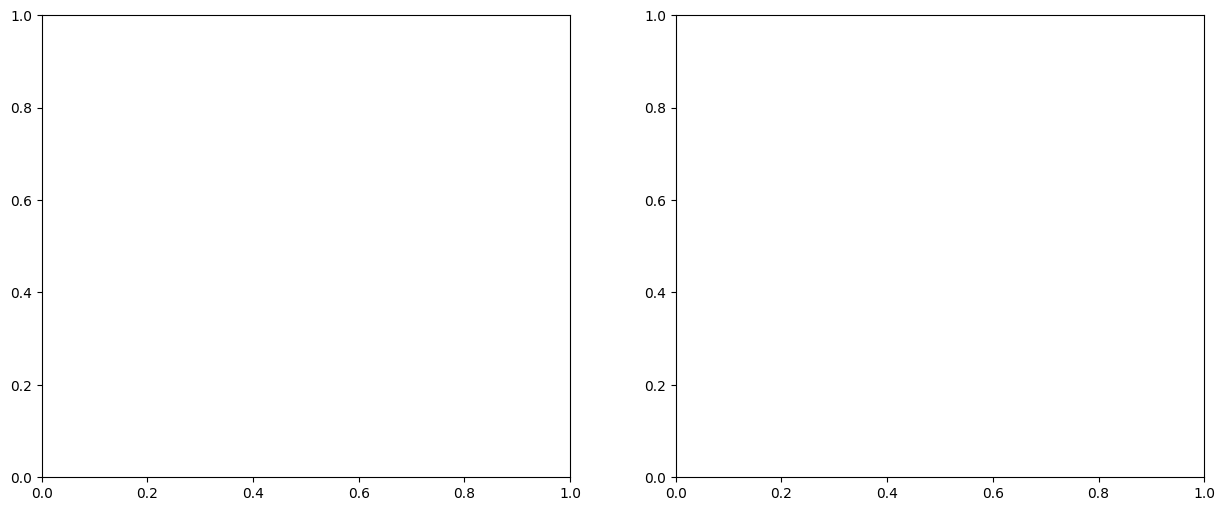

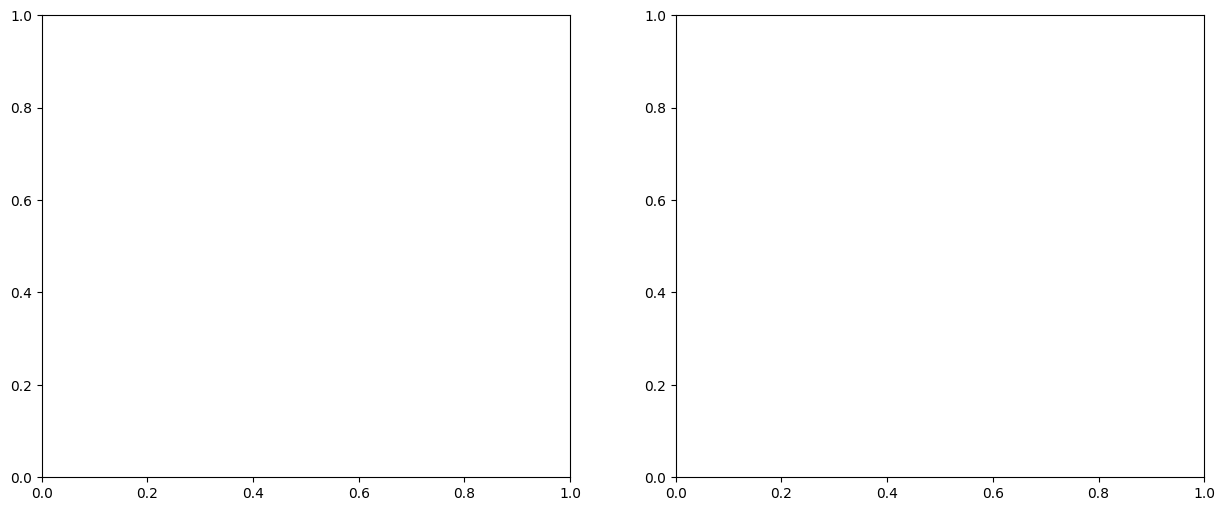

In [4]:
# ========================================
# SPLIT-UP JUNCTIONS OPTIMIZATION ANALYSIS
# ========================================

logger.info("=== Split-up Junctions Optimization Analysis ===")

# Filter for categories that involve multiple percentile combinations (where junctions matter)
junction_categories = [
    "Multiple_Percentile_Combinations",
]

# Check if optimizer_split_up_junctions column exists
if "optimizer_split_up_junctions" not in df_latest.columns:
    logger.warning(
        "optimizer_split_up_junctions column not found in data - skipping split-up junctions analysis"
    )
else:
    junction_stats = []

    # Filter data for junction-related categories
    df_junctions = df_latest[df_latest["category"].isin(junction_categories)]
    logger.info(f"Found {len(df_junctions)} records for junction-related categories")

    if not df_junctions.empty:
        # Create comprehensive comparison
        for category in junction_categories:
            df_cat = df_junctions[df_junctions["category"] == category]
            if df_cat.empty:
                continue

            logger.info(f"Analyzing category: {category} ({len(df_cat)} records)")

            # Create comparison plot for each fainder_mode
            for fainder_mode in df_cat["fainder_mode"].unique():
                df_mode = df_cat[df_cat["fainder_mode"] == fainder_mode]
                if df_mode.empty:
                    continue

                logger.info(f"  Fainder mode: {fainder_mode} ({len(df_mode)} records)")

                # Group by optimizer setting and scenario
                comparison_data = []

                for split_junctions in df_mode["optimizer_split_up_junctions"].unique():
                    df_opt = df_mode[
                        df_mode["optimizer_split_up_junctions"] == split_junctions
                    ]

                    for scenario in df_opt["scenario"].unique():
                        df_scenario = df_opt[df_opt["scenario"] == scenario]

                        if not df_scenario.empty:
                            mean_time = df_scenario["execution_time"].mean()
                            std_time = df_scenario["execution_time"].std()
                            min_time = df_scenario["execution_time"].min()
                            max_time = df_scenario["execution_time"].max()
                            count = len(df_scenario)
                            median_time = df_scenario["execution_time"].median()

                            comparison_data.append(
                                {
                                    "category": category,
                                    "fainder_mode": fainder_mode,
                                    "optimizer_split_up_junctions": split_junctions,
                                    "scenario": scenario,
                                    "mean_execution_time": mean_time,
                                    "median_execution_time": median_time,
                                    "std_execution_time": std_time,
                                    "min_execution_time": min_time,
                                    "max_execution_time": max_time,
                                    "count": count,
                                }
                            )

                            junction_stats.append(
                                {
                                    "category": category,
                                    "fainder_mode": fainder_mode,
                                    "optimizer_split_up_junctions": split_junctions,
                                    "scenario": scenario,
                                    "mean": mean_time,
                                    "median": median_time,
                                    "std": std_time,
                                    "min": min_time,
                                    "max": max_time,
                                    "count": count,
                                }
                            )

                if comparison_data:
                    comparison_df = pd.DataFrame(comparison_data)

                    # Create comparison plots
                    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

                    # Bar plot comparison
                    scenarios = comparison_df["scenario"].unique()
                    x = np.arange(len(scenarios))
                    width = 0.35

                    opt_on = comparison_df[
                        comparison_df["optimizer_split_up_junctions"] == True
                    ]
                    opt_off = comparison_df[
                        comparison_df["optimizer_split_up_junctions"] == False
                    ]

                    if not opt_on.empty and not opt_off.empty:
                        # Align data by scenario
                        on_means = [
                            opt_on[opt_on["scenario"] == s]["mean_execution_time"].iloc[
                                0
                            ]
                            if not opt_on[opt_on["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]
                        off_means = [
                            opt_off[opt_off["scenario"] == s][
                                "mean_execution_time"
                            ].iloc[0]
                            if not opt_off[opt_off["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]

                        on_stds = [
                            opt_on[opt_on["scenario"] == s]["std_execution_time"].iloc[
                                0
                            ]
                            if not opt_on[opt_on["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]
                        off_stds = [
                            opt_off[opt_off["scenario"] == s][
                                "std_execution_time"
                            ].iloc[0]
                            if not opt_off[opt_off["scenario"] == s].empty
                            else 0
                            for s in scenarios
                        ]

                        ax1.bar(
                            x - width / 2,
                            off_means,
                            width,
                            label="Split Junctions OFF",
                            alpha=0.8,
                            yerr=off_stds,
                            capsize=5,
                            color="lightcoral",
                        )
                        ax1.bar(
                            x + width / 2,
                            on_means,
                            width,
                            label="Split Junctions ON",
                            alpha=0.8,
                            yerr=on_stds,
                            capsize=5,
                            color="lightblue",
                        )

                        ax1.set_xlabel("Scenario")
                        ax1.set_ylabel("Execution Time (s)")
                        ax1.set_title(
                            f"Split Junctions Impact - {category} - {fainder_mode}"
                        )
                        ax1.set_xticks(x)
                        ax1.set_xticklabels(scenarios, rotation=45, ha="right")
                        ax1.legend()

                        # Improvement percentages
                        improvements = []
                        scenario_labels = []
                        for i, scenario in enumerate(scenarios):
                            if on_means[i] > 0 and off_means[i] > 0:
                                improvement = (
                                    (off_means[i] - on_means[i]) / off_means[i]
                                ) * 100
                                improvements.append(improvement)
                                scenario_labels.append(scenario)
                                logger.info(
                                    f"    {scenario}: {improvement:.2f}% improvement when ON"
                                )

                        if improvements:
                            colors = [
                                "green" if imp > 0 else "red" for imp in improvements
                            ]
                            ax2.bar(
                                range(len(improvements)),
                                improvements,
                                color=colors,
                                alpha=0.7,
                            )
                            ax2.set_xlabel("Scenario")
                            ax2.set_ylabel("Performance Improvement (%)")
                            ax2.set_title(
                                f"Split Junctions Improvement - {category} - {fainder_mode}"
                            )
                            ax2.set_xticks(range(len(scenario_labels)))
                            ax2.set_xticklabels(
                                scenario_labels, rotation=45, ha="right"
                            )
                            ax2.axhline(y=0, color="black", linestyle="-", alpha=0.3)
                            ax2.grid(True, alpha=0.3)

                        plt.tight_layout()
                        filename = f"figures/optimizer/split_junctions_{category}_{fainder_mode}.png"
                        plt.savefig(filename)
                        logger.info(f"    Saved plot: {filename}")
                        plt.show()

    # Save split-up junctions statistics
    if junction_stats:
        junction_stats_df = pd.DataFrame(junction_stats)
        junction_stats_file = csv_dir / f"split_junctions_stats_{timestamp}.csv"
        junction_stats_df.to_csv(junction_stats_file, index=False)
        logger.info(f"Saved split-up junctions statistics to: {junction_stats_file}")